<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_04_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Basics

## Exercise 1

Given the a person's height is 5 ft 9 inches, use the variables below to compute the person's height in meters and assign it to `person_height_m`.

(1 feet = 0.3048 meters; 1 inch = 0.0254 meters)

In [ ]:
person_height_ft = 5
person_height_inch = 9

### Suggested solution

In [ ]:
person_height_m = person_height_ft * 0.3048 + person_height_inch * 0.0254
person_height_m

1.7526

---

## Exercise 2

The person above weighs 111 kilograms. What is the person's body-mass index (BMI; assign it to `person_bmi`)?

Is the person overweight based on the criteria BMI > 25 (assign it to `person_overweight`)?

In [ ]:
person_weight = 111

### Suggested Solution

In [ ]:
person_bmi = person_weight / (person_height_m ** 2) 
person_bmi

36.13743837443567

In [ ]:
person_overweight = person_bmi > 25
person_overweight

True

---

## Exercise 3

Using the body temperature list `patients_body_temperature`, create a list that indicates

1. their body temperatures in °F (multiply values in °C by 1.8 and then add 32).
2. whether they have fever, as defined by body temperatures over 37.6°C.

In [ ]:
patients_body_temperature = [36.4, 37.8, 37, 35.8, 35.6, 36.2, 36.4, 36.9, 37.5, 36.4]

### Suggested solution

3.1 

In [ ]:
patients_body_temperature_f = []

for x in patients_body_temperature: # loop through the original list
    patients_body_temperature_f.append(x * 1.8 + 32)

print(patients_body_temperature_f)

[97.52, 100.03999999999999, 98.60000000000001, 96.44, 96.08, 97.16000000000001, 97.52, 98.42, 99.5, 97.52]


In [ ]:
# alternative
patients_body_temperature_f = [x * 1.8 + 32 for x in patients_body_temperature]
print(patients_body_temperature_f)

[97.52, 100.03999999999999, 98.60000000000001, 96.44, 96.08, 97.16000000000001, 97.52, 98.42, 99.5, 97.52]


3.2

In [ ]:
patients_fever = []

for x in patients_body_temperature: # loop through the original list
    patients_fever.append(x > 37.6)

print(patients_fever)

[False, True, False, False, False, False, False, False, False, False]


In [ ]:
# alternative
patients_body_temperature_f = [x > 37.6 for x in patients_body_temperature]
print(patients_body_temperature_f)

[False, True, False, False, False, False, False, False, False, False]


---

## Exercise 4

ICD-10 codes consist of three or more characters. Every code begins with an alphabet, which is indicative of the **chapter** to which the code is classified. The second and third characters are numbers. The first three characters of ICD-10 are indicative of the **category**, which describes the general type of the injury or disease.

Based on the list of ICD-10 codes below, 

1. extract the second code from the list.
2. extract the last code from the list.
3. extract the respective ICD10 chapter of each code. Assign it to `sample_icd10_chapter`
4. extract the respective ICD10 category of each code. Assign it to `sample_icd10_category`.
5. count the number of codes that belong to the chapter "I" (Diseases of the circulatory system).

In [ ]:
sample_icd10_codes = [
    'I10', # Essential (primary) hypertension 
    'C73', # Malignant neoplasm of thyroid gland
    'E11', # Type 2 diabetes mellitus
    'E11.9', # Type 2 diabetes mellitus without complications 
    'U07.1', # COVID-19 
    'K26.1', # Acute duodenal ulcer with perforation
    'I21.3', # Acute transmural myocardial infarction of unspecified site
    'A37.81', # Whooping cough due to other Bordetella species with pneumonia
    'I25.111' # Atherosclerotic heart disease of native coronary artery with angina pectoris with documented spasm
]

### Suggested Solution

4.1

In [ ]:
sample_icd10_codes[1]

'C73'

4.2

In [ ]:
sample_icd10_codes[-1]

'I25.111'

In [ ]:
# alternative
sample_icd10_codes[8]

'I25.111'

4.3

In [ ]:
sample_icd10_chapter = []

for x in sample_icd10_codes: # loop through the original list
    sample_icd10_chapter.append(x[0])

print(sample_icd10_chapter)

['I', 'C', 'E', 'E', 'U', 'K', 'I', 'A', 'I']


4.4

In [ ]:
sample_icd10_category = []

for x in sample_icd10_codes: # loop through the original list
    sample_icd10_category.append(x[:3])

print(sample_icd10_category)

['I10', 'C73', 'E11', 'E11', 'U07', 'K26', 'I21', 'A37', 'I25']


4.5

In [ ]:
sample_icd10_chapter.count("I")

3

---

# Tabular Data in Python

## Exercise 5

Import the `pandas` package and create an alias `pd` for it.

### Suggested Solution


In [ ]:
import pandas as pd

---

## Importing MIMIC-III data from BigQuery as a Pandas DataFrame

### Provide your credentials to the Colab runtime

Run the following code. You will be given a link that requests permission of the notebook to access your data from BigQuery. Enter that link and accept the request. You might be asked to enter your password in this step. 

After that, you will be given a one-time authentication token. Copy and paste it to the textbox under the link. If successful, the message "Authenticated" would be printed. 



In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


**Troubleshooting**

If you are unable to authenticate yourself, check for the following: 

* Make sure you have followed the [guide to access MIMIC-III on BigQuery](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).
* Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one. 
  * Almost all of your interactions with Google Cloud Platform (GCP) are associated with a project. Importantly, all billing for your usage must be allotted to a single project. In order to use BigQuery you must have an active project associated with your account. BigQuery offers a $300 free trial for first time users. You should not be billed for any reasonable usage for completing the module.
* [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.

---

## Exercise 6

1. Write a SQL query to retrieve the entire `admissions` table in MIMIC-III. Test your query in [BigQuery](https://console.cloud.google.com/bigquery).
2. Execute the above SQL query within Colab and save the results as a `DataFrame` called `df`. The skeleton code below is given for your reference. Your GCP project ID can be found in [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager).



In [ ]:
%%bigquery --project your-project-id-here

your-sql-code-here


ERROR:
 table_id must be a fully-qualified ID in standard SQL format, e.g., "project.dataset.table_id", got your-sql-code-here


### Suggested Solution

6.1

The SQL query is 

```sql
SELECT * FROM `physionet-data.mimiciii_clinical.admissions`
```

6.2

In [ ]:
%%bigquery df --project your-project-id-here

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,917,744,148472,2106-07-12 18:52:00,2106-07-16 17:21:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,None,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,NaT,NaT,CORONARY ARTERY DISEASE\ANGIOPLASTY,0,1
58972,44966,56130,114902,2194-09-22 17:07:00,2194-10-08 12:00:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Private,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),UNABLE TO OBTAIN,2194-09-22 14:59:00,2194-09-22 18:26:00,S/P FALL,0,1
58973,53532,82746,156806,2123-09-08 06:45:00,2123-09-24 17:22:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2123-09-08 03:39:00,2123-09-08 07:55:00,AMS,0,1
58974,12305,10056,100375,2129-05-02 00:12:00,2129-05-06 13:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,None,CHRISTIAN SCIENTIST,UNKNOWN (DEFAULT),WHITE,NaT,NaT,SEPSIS,0,1


---

## Exercise 7

Using the admissions table in MIMIC-III (`df`), what are the top 5 types of diagnosis at admission?

### Suggested Solution

In [ ]:
df['DIAGNOSIS'].value_counts()

NEWBORN                                                                                                                        7823
PNEUMONIA                                                                                                                      1566
SEPSIS                                                                                                                         1184
CONGESTIVE HEART FAILURE                                                                                                        928
CORONARY ARTERY DISEASE                                                                                                         840
                                                                                                                               ... 
SEVERE ANEMIA                                                                                                                     1
HYPOTENSION;WEAKNESS\HYPOTENSION;WEAKNESS                                   

* New born, pneumonia, sepsis, congestive heart failure, and coronary artery disease. 

*Note:* The output is truncated if it's too long. If you want to see more from the list, you can use slicing to do so. See the notebook "Introduction to Python" for details. 

In [ ]:
df['DIAGNOSIS'].value_counts()[:10]

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
Name: DIAGNOSIS, dtype: int64

---

## Exercise 8

Using the admissions table in MIMIC-III (`df`), what are the unique values and respective occurrences in the column `HOSPITAL_EXPIRE_FLAG`?

What is the rate of in-hospital death across all hospitalisations? (*Hint:* Check out the meaning of the variable from [MIMIC's documentation](https://mimic.mit.edu/docs/iii/tables/).)

### Suggested Solution

In [ ]:
df['HOSPITAL_EXPIRE_FLAG'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [ ]:
df['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: Int64

The in-hospital death rate is

In [ ]:
df['HOSPITAL_EXPIRE_FLAG'].mean()

# or alternatively, 
# 5854 / (53122 + 5854)

0.09926071622354857

---

## Exercise 9

Using the admissions table in MIMIC-III (`df`), 

1. what are the unique values and respective occurrences in the column `MARITAL_STATUS`?

2. filter the dataset such that the column `MARITAL_STATUS` does not contain missing values, nor `'UNKNOWN (DEFAULT)'`.

### Suggested Solution

9.1

In [ ]:
df['MARITAL_STATUS'].value_counts()

MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [ ]:
# note that `value_counts` ignores missing values by default. To include them to the count explicitly, we have to specify `dropna=False`.
df['MARITAL_STATUS'].value_counts(dropna=False)

MARRIED              24239
SINGLE               13254
NaN                  10128
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

9.2

In [ ]:
df_filtered = df[(df['MARITAL_STATUS'].notna()) & (df['MARITAL_STATUS'] != 'UNKNOWN (DEFAULT)')]

df_filtered

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
10128,12520,10235,103676,2179-08-11 23:54:00,2179-08-24 15:26:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,SINGLE,WHITE,2179-08-11 20:29:00,2179-08-12 00:29:00,"C2 FRACTURE,ODONTOID FRACTURE",0,1
10129,15030,12232,182524,2100-09-21 19:00:00,2100-09-28 11:44:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,SINGLE,UNKNOWN/NOT SPECIFIED,2100-09-21 12:44:00,2100-09-21 19:01:00,PNEUMONIA;CHEST PAIN,0,1
10130,1028,828,180903,2200-10-28 01:07:00,2200-10-28 13:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,None,None,SINGLE,WHITE,2200-10-27 22:15:00,2200-10-28 00:30:00,DRUG OVERDOSE,0,1
10131,2595,2141,193356,2171-08-11 17:36:00,2171-08-15 10:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,None,SINGLE,WHITE,2171-08-11 14:31:00,2171-08-11 17:07:00,S/P MVA,0,1
10132,2815,2327,125663,2127-09-15 23:08:00,2127-09-20 13:02:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,None,SINGLE,WHITE,2127-09-15 17:44:00,2127-09-16 00:35:00,STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURI...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58626,39138,32269,110753,2182-12-04 11:57:00,2182-12-10 13:57:00,NaT,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,NOT SPECIFIED,LIFE PARTNER,WHITE,NaT,NaT,PERICARDIAL EFFUSION,0,1
58627,48352,66603,166019,2178-04-15 19:14:00,2178-04-30 14:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicaid,ENGL,NOT SPECIFIED,LIFE PARTNER,WHITE,NaT,NaT,SEPSIS;HYPOTENSION;ACUTE RENAL FAILURE,0,1
58628,46623,61149,115021,2126-10-15 03:54:00,2126-10-25 14:48:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,LIFE PARTNER,WHITE,NaT,NaT,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT REDO ...,0,1
58629,58564,98717,174054,2188-02-07 18:05:00,2188-02-14 12:15:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,LIFE PARTNER,PATIENT DECLINED TO ANSWER,2188-02-07 14:16:00,2188-02-07 19:00:00,S/P FALL,0,1


In [ ]:
df_filtered['MARITAL_STATUS'].value_counts()

MARRIED         24239
SINGLE          13254
WIDOWED          7211
DIVORCED         3213
SEPARATED         571
LIFE PARTNER       15
Name: MARITAL_STATUS, dtype: int64

---

## Exercise 10

Run the following code to retrieve the COVID dataset. 

1. Based on `df_covid_filtered`, which country has the most new deaths per million (`new_deaths_per_million`) on Jan 1, 2021?

2. Plot a histogram of new deaths per million across all countries.

3. Calculate the summary statistics of new cases per million across all countries.

In [ ]:
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df_covid_filtered = df_covid[df_covid['date'] == '2022-01-01'] # filter by date
df_covid_filtered = df_covid_filtered[~df_covid_filtered['iso_code'].str.startswith('OWID_')] # removes non-country locations such as "Worldwide", "Asia" and "Low income"

df_covid_filtered

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
677,AFG,Asia,Afghanistan,2022-01-01,158107.0,23.0,30.286,7356.0,0.0,1.000,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2833,ALB,Europe,Albania,2022-01-01,210224.0,0.0,383.143,3217.0,0.0,4.000,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3905,DZA,Africa,Algeria,2022-01-01,218818.0,386.0,348.857,6284.0,8.0,7.857,...,30.4,83.741,1.90,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4971,AND,Europe,Andorra,2022-01-01,23740.0,0.0,287.143,140.0,0.0,0.143,...,37.8,NaN,NaN,83.73,0.868,79843.0,NaN,NaN,NaN,NaN
6019,AGO,Africa,Angola,2022-01-01,82398.0,805.0,1608.000,1772.0,2.0,3.714,...,NaN,26.664,NaN,61.15,0.581,35588996.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247674,VNM,Asia,Vietnam,2022-01-01,1746092.0,14835.0,15662.429,32610.0,216.0,229.000,...,45.9,85.847,2.60,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN
249547,WLF,Oceania,Wallis and Futuna,2022-01-01,454.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
251681,YEM,Asia,Yemen,2022-01-01,10127.0,1.0,2.286,1984.0,0.0,0.143,...,29.2,49.542,0.70,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN
252731,ZMB,Africa,Zambia,2022-01-01,257948.0,3674.0,3766.714,3740.0,6.0,6.143,...,24.7,13.938,2.00,63.89,0.584,20017670.0,NaN,NaN,NaN,NaN


### Suggested Solution

10.1

In [ ]:
# first find out the maximum with `.max()`
df_covid_filtered['new_deaths_per_million'].max()

33.357

In [ ]:
# Then filter
df_covid_filtered[df_covid_filtered['new_deaths_per_million'] == df_covid_filtered['new_deaths_per_million'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192234,LCA,North America,Saint Lucia,2022-01-01,13640.0,70.0,52.143,301.0,6.0,0.857,...,NaN,87.202,1.3,76.2,0.759,179872.0,NaN,NaN,NaN,NaN


In [ ]:
# alternatively, sort the dataframe by 'new_deaths_per_million' in decending order, then look at the first few rows
df_covid_filtered.sort_values('new_deaths_per_million', ascending = False).head() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192234,LCA,North America,Saint Lucia,2022-01-01,13640.0,70.0,52.143,301.0,6.0,0.857,...,NaN,87.202,1.30,76.20,0.759,179872.0,NaN,NaN,NaN,NaN
148734,MCO,Europe,Monaco,2022-01-01,4985.0,0.0,33.571,39.0,1.0,0.143,...,NaN,NaN,13.80,86.75,NaN,36491.0,NaN,NaN,NaN,NaN
42233,CYM,North America,Cayman Islands,2022-01-01,8943.0,125.0,79.571,12.0,1.0,0.143,...,NaN,NaN,NaN,83.92,NaN,68722.0,NaN,NaN,NaN,NaN
84385,GEO,Asia,Georgia,2022-01-01,936844.0,2103.0,2019.571,13850.0,50.0,58.143,...,55.5,NaN,2.60,73.77,0.812,3744385.0,NaN,NaN,NaN,NaN
183062,POL,Europe,Poland,2022-01-01,4120248.0,12033.0,10951.857,97559.0,505.0,464.000,...,33.1,NaN,6.62,78.73,0.880,39857144.0,NaN,NaN,NaN,NaN


10.2

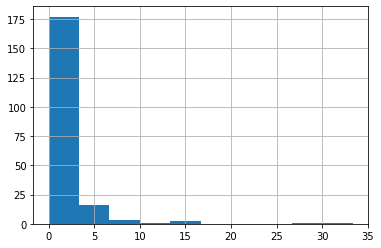

In [ ]:
df_covid_filtered['new_deaths_per_million'].hist()

10.3

In [ ]:
df_covid_filtered[['new_cases_per_million']].describe()

,new_cases_per_million
count,214.000000
mean,387.018238
std,905.601675
min,0.000000
25%,0.000000
50%,25.591000
75%,267.980250
max,5967.958000
